In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from tqdm.auto import tqdm
tqdm.pandas()

# CT23

In [467]:
df_train = pd.read_csv("../data/checkworthiness/CT23_1B_checkworthy_english/CT23_1B_checkworthy_english_train.tsv", sep="\t")
df_validation = pd.read_csv("../data/checkworthiness/CT23_1B_checkworthy_english/CT23_1B_checkworthy_english_dev.tsv", sep="\t")
df_test = pd.read_csv("../data/checkworthiness/CT23_1B_checkworthy_english/CT23_1B_checkworthy_english_test_gold.tsv", sep="\t")

In [468]:
print(df_train.shape)
df_train.head()

(16876, 3)


,Sentence_id,Text,class_label
0,30313,And so I know that this campaign has caused so...,No
1,19099,"Now, let's balance the budget and protect Medi...",No
2,33964,I'd like to mention one thing.,No
3,16871,I must remind him the Democrats have controlle...,Yes
4,13150,And to take a chance uh - now be - and not mak...,No


In [469]:
print(df_validation.shape)
df_validation.head()

(5625, 3)


,Sentence_id,Text,class_label
0,29286,You can't bring back jobs.,No
1,23105,And you'll find a tort reform plan.,No
2,10665,We can work on nuclear power plants.,No
3,17398,"So, I think that many Democrats are seeing the...",No
4,7334,And we fixed it for a reason: because there ar...,No


In [470]:
print(df_test.shape)
df_test.head()

(318, 3)


,Sentence_id,Text,class_label
0,37436,He's been a professor for a long time at a gre...,No
1,37440,There's no way they would give it up.,No
2,37463,They're able to charge women more for the same...,Yes
3,37470,"As far as a say is concerned, the people alrea...",No
4,37504,I am the Democratic Party right now.,No


In [471]:
train_list = df_train["Text"].tolist()
validation_list = df_validation["Text"].tolist()
test_list = df_test["Text"].tolist()

In [472]:
counter = 0
to_remove = []
for i, data in tqdm(df_validation.iterrows()):
    if data["Text"] in train_list:
        to_remove.append(data["Sentence_id"])
        print(data["Text"])
        counter += 1

print()        
print(f"{counter} duplicates in validation that are also present in train")

0it [00:00, ?it/s]

We have a government that doesn't work.
I'd like to respond to that.
I think the matter is settled once and for all.
I will balance the budget every year.
I'm going to change that.
I'll give you an example.
And I'm very proud of it.
We created 23 million new jobs.
I think that's a mistake.
We don't know who the rebels are.
Thank you very, very much.
It shouldn't happen in America.
But I think we're all in this together, and my plea to the American people is values in the schools.
We have to bring back law and order.
Let's get back to Medicare.
We had a better idea.
I don't agree with that.
Thank you for your question.
We're 9 million jobs short of that.
That's got to be changed.
But we also have to take demand seriously.
Where did you find this?
That I can tell you.
Governors like me and others have been trying to deal with the consequences.
I can't think of any.
Here we are with a government that's been dealing with a drug-running Panamanian dictator.
Where did you find this?
And Mr. 

In [473]:
print(df_validation.shape)
df_validation = df_validation[~df_validation.Sentence_id.isin(to_remove)]
print(df_validation.shape)

(5625, 3)
(5588, 3)


In [474]:
counter = 0
to_remove = []
for i, data in tqdm(df_test.iterrows()):
    if data["Text"] in train_list:
        to_remove.append(data["Sentence_id"])
        print(data["Text"])
        counter += 1

print()        
print(f"{counter} duplicates in test that are also present in train")

0it [00:00, ?it/s]

I'll give you an example.
Why didn't you do it?

2 duplicates in test that are also present in train


In [475]:
print(df_test.shape)
df_test = df_test[~df_test.Sentence_id.isin(to_remove)]
print(df_test.shape)

(318, 3)
(316, 3)


In [476]:
counter = 0
to_remove = []
for i, data in tqdm(df_validation.iterrows()):
    if data["Text"] in test_list:
        to_remove.append(data["Sentence_id"])
        print(data["Text"])
        counter += 1

print()        
print(f"{counter} duplicates in validation that are also present in test")

0it [00:00, ?it/s]

Can I respond to that?

1 duplicates in validation that are also present in test


In [477]:
print(df_validation.shape)
df_validation = df_validation[~df_validation.Sentence_id.isin(to_remove)]
print(df_validation.shape)

(5588, 3)
(5587, 3)


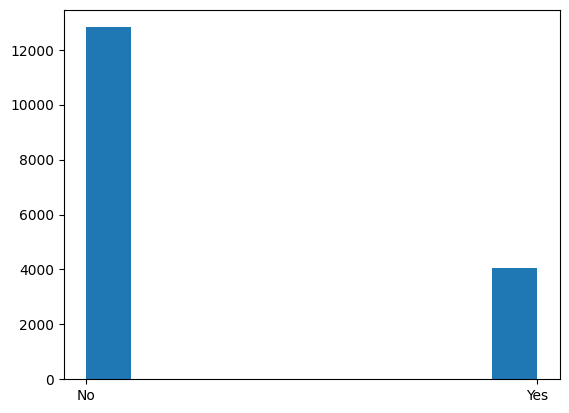

No     75.954018
Yes    24.045982
Name: class_label, dtype: float64

In [478]:
plt.hist(df_train["class_label"])
plt.show()

(df_train["class_label"].value_counts()/df_train["class_label"].count()) * 100

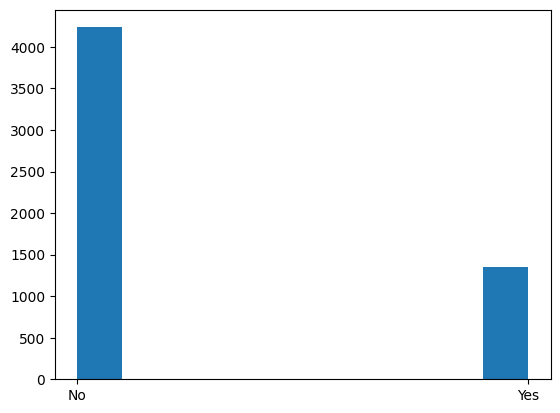

No     75.818865
Yes    24.181135
Name: class_label, dtype: float64

In [479]:
plt.hist(df_validation["class_label"])
plt.show()

(df_validation["class_label"].value_counts()/df_validation["class_label"].count()) * 100

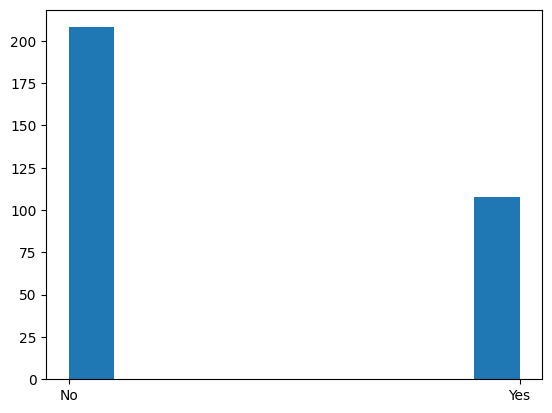

No     65.822785
Yes    34.177215
Name: class_label, dtype: float64

In [480]:
plt.hist(df_test["class_label"])
plt.show()

(df_test["class_label"].value_counts()/df_test["class_label"].count()) * 100

In [481]:
df_train.to_csv("../data/checkworthiness/CT23_1B_checkworthy_english/CT23_1B_checkworthy_english_train.tsv", sep="\t", index=False)
df_validation.to_csv("../data/checkworthiness/CT23_1B_checkworthy_english/CT23_1B_checkworthy_english_dev.tsv", sep="\t", index=False)
df_test.to_csv("../data/checkworthiness/CT23_1B_checkworthy_english/CT23_1B_checkworthy_english_test_gold.tsv", sep="\t", index=False)

# FEVER

In [500]:
df_train = pd.read_csv("../data/verification/FEVER/fever_train_sampled.csv", index_col=0)
df_validation = pd.read_csv("../data/verification/FEVER/fever_validation.csv", index_col=0)
df_test = pd.read_csv("../data/verification/FEVER/fever_test.csv", index_col=0)

In [501]:
print(df_train.shape)
print(list(range(0, df_train.shape[0])) == df_train.index.tolist())
df_train.head()

(15000, 4)
True


,claim,evidence,id,label
0,The Nilotic languages are spoken in Tanzania.,"[['Nilotic_languages', '0', 'The Nilotic langu...",c7858f1b36fa9029e2fc0dee1a8da8b9,1
1,Manchester City F.C. continued in 2008.,"[['Manchester_City_F.C.', '7', 'Having regaine...",269ae705ada0d479f9b9ec2d9dbc663c,2
2,Jack Black attended acting school for Kung Fu ...,"[['Jack_Black', '2', ""He is known for his role...",dd3deeb1f1a09b271734711015cb3b67,2
3,Karan Johar writes screenplays.,"[['Karan_Johar', '4', 'Johar made his director...",854397cd93949f4d934c8535fd224d11,1
4,Winona Ryder is not an actress.,"[['Winona_Ryder', '19', 'In 2010 , she was nom...",5bf426143b261ebe2e276a111a422d47,0


In [502]:
print(df_validation.shape)
print(list(range(0, df_validation.shape[0])) == df_validation.index.tolist())
df_validation.head()

(15935, 6)
True


,claim,label,evidence,id,verifiable,original_id
0,Jackie (2016 film) was directed by Peter Jackson.,REFUTES,"[['Jackie_-LRB-2016_film-RRB-', '0', 'Jackie i...",e9a7305690bde211b7434ccd53b3a763,VERIFIABLE,70882
1,The CONCACAF Champions League is organized for...,REFUTES,"[['CONCACAF_Champions_League', '0', 'The CONCA...",82caf51ce8a246f1b5244cc1fd8ca9d4,VERIFIABLE,37715
2,"Syracuse, New York, had a population of 145,17...",SUPPORTS,"[['Syracuse,_New_York', '2', 'At the 2010 cens...",b8182754eb4410163c45b97ddb3b6de1,VERIFIABLE,171594
3,Eric Church has written over 100 songs.,NOT ENOUGH INFO,"[['Luke_Laird', '3', 'He has also written and ...",2ab70646fffa23b2c2546796d6d85fd3,NOT VERIFIABLE,42459
4,Ludwig van Beethoven was born in 1787.,NOT ENOUGH INFO,"[['Ludwig_van_Beethoven', '5', 'Born in Bonn ,...",95bcef60842dc24a2d9b18ae25020303,NOT VERIFIABLE,223665


In [503]:
print(df_test.shape)
print(list(range(0, df_test.shape[0])) == df_test.index.tolist())
df_test.head()

(16039, 6)
True


,claim,label,evidence,id,verifiable,original_id
0,Kareena Kapoor was a commercial failure.,NOT ENOUGH INFO,"[['Kareena_Kapoor', '6', 'This initial success...",9d6e35c175cff59b9b6d926446f62d1d,NOT VERIFIABLE,23567
1,Natasha Lyonne was born in 1995.,REFUTES,"[['Natasha_Lyonne', '0', 'Natasha Bianca Lyonn...",91d4d8fe6b87c39fd8be83114415ac04,VERIFIABLE,68676
2,The Maze Runner is a sports competition.,REFUTES,"[['The_Maze_Runner_-LRB-film-RRB-', '1', 'The ...",e89ba0251cdaf5a9ca315a99b0d48e13,VERIFIABLE,43554
3,Oscar Isaac acted in Twilight.,NOT ENOUGH INFO,"[['Oscar_Hernandez', '17', 'Oscar Isaac -LRB- ...",4a5bfe6a7c55f55ce3deecbd89e43a52,NOT VERIFIABLE,10499
4,Designated Survivor (TV series) is a televisio...,SUPPORTS,"[['Designated_Survivor_-LRB-TV_series-RRB-', '...",e4882c5eed7ce02a58d825f3c4cc045c,VERIFIABLE,72143


In [504]:
train_list = df_train["claim"].tolist()
validation_list = df_validation["claim"].tolist()
test_list = df_test["claim"].tolist()

In [505]:
set(df_validation.index.tolist()).intersection(set(to_remove))

set()

In [506]:
print(df_validation.shape)
df_validation = df_validation[~df_validation.index.isin(to_remove)]
print(df_validation.shape)

(15935, 6)
(15935, 6)


In [507]:
counter = 0
to_remove = []
for i, data in tqdm(df_test.iterrows()):
    if data["claim"] in train_list:
        to_remove.append(i)
        print(data["claim"])
        counter += 1

print()        
print(f"{counter} duplicates in test that are also present in train")

0it [00:00, ?it/s]


0 duplicates in test that are also present in train


In [508]:
set(df_test.index.tolist()).intersection(set(to_remove))

set()

In [509]:
print(df_test.shape)
df_test = df_test[~df_test.index.isin(to_remove)]
print(df_test.shape)

(16039, 6)
(16039, 6)


In [510]:
counter = 0
to_remove = []
for i, data in tqdm(df_validation.iterrows()):
    if data["claim"] in test_list:
        to_remove.append(i)
        print(data["claim"])
        counter += 1

print()        
print(f"{counter} duplicates in validation that are also present in test")

0it [00:00, ?it/s]


0 duplicates in validation that are also present in test


In [511]:
print(df_validation.shape)
df_validation = df_validation[~df_validation.index.isin(to_remove)]
print(df_validation.shape)

(15935, 6)
(15935, 6)


In [512]:
set(df_validation.index.tolist()).intersection(set(to_remove))

set()

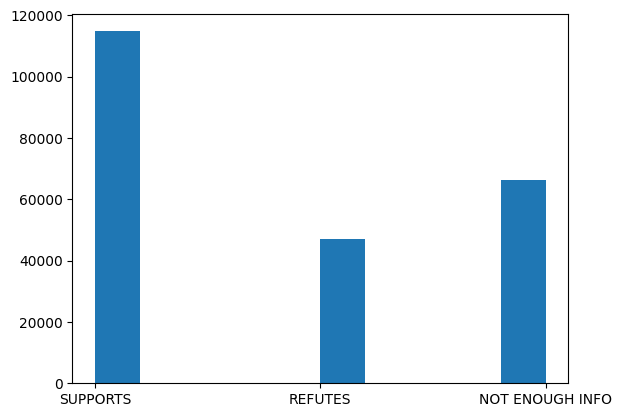

SUPPORTS           50.290218
NOT ENOUGH INFO    29.078707
REFUTES            20.631075
Name: label, dtype: float64

In [513]:
df_whole = pd.read_csv("../data/verification/FEVER/fever_train.csv", index_col=0)
plt.hist(df_whole["label"])
plt.show()


(df_whole["label"].value_counts()/df_whole["label"].count()) * 100

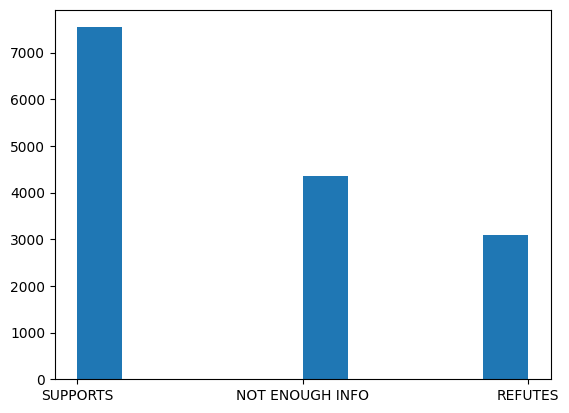

SUPPORTS           50.286667
NOT ENOUGH INFO    29.080000
REFUTES            20.633333
Name: label, dtype: float64

In [518]:
tmp = df_train["label"].map({
    0:"REFUTES",
    1:"SUPPORTS",
    2:"NOT ENOUGH INFO",
})
plt.hist(tmp)
plt.show()

(tmp.value_counts()/tmp.count()) * 100

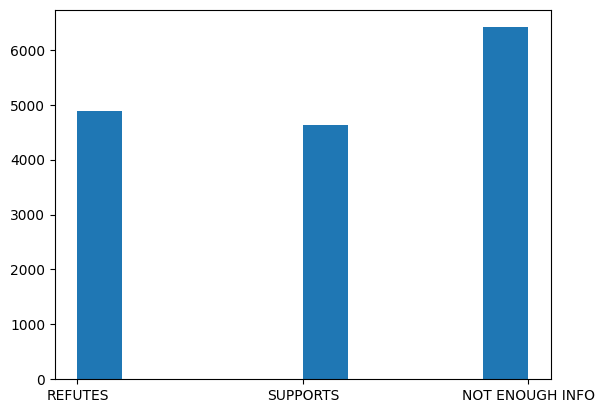

NOT ENOUGH INFO    40.225918
REFUTES            30.668340
SUPPORTS           29.105742
Name: label, dtype: float64

In [515]:
plt.hist(df_validation["label"])
plt.show()


(df_validation["label"].value_counts()/df_validation["label"].count()) * 100

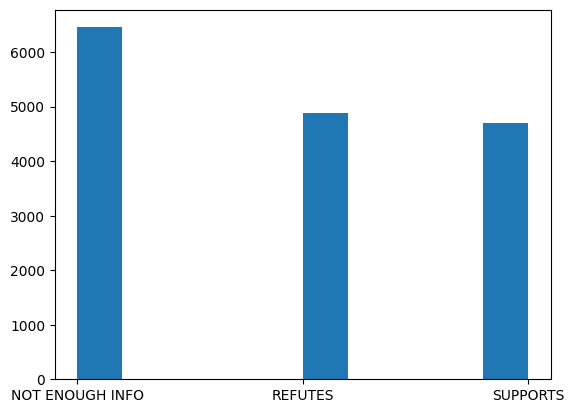

NOT ENOUGH INFO    40.251886
REFUTES            30.481950
SUPPORTS           29.266164
Name: label, dtype: float64

In [517]:
plt.hist(df_test["label"])
plt.show()

(df_test["label"].value_counts()/df_test["label"].count()) * 100